# Packages

In [1]:
import networkx as nx
from netwulf import visualize
#from igraph import *
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
#import cairocffi as cairo

# Importing the csv

In [2]:
df_sheet1 = pd.read_excel("/Users/federiconutarelli 1/Desktop/Jupyterdemo/dati.xlsx", sheetname=1, skiprows = 2)
#df_sheet1  
df_sheet2 = pd.read_excel("/Users/federiconutarelli 1/Desktop/Jupyterdemo/dati.xlsx", sheetname=2, skiprows = 2)
#df_sheet2   
#df_sheet1.iloc[0] 
#mi da tutta la prima riga del dataframe (escluso l'header). A me questo servirà molto in futuro quando creerò il dizionario.



/anaconda3/lib/python3.7/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


In [3]:
paesi_mena = list(df_sheet1.columns)[3:] #prendo la prima riga a partire dal terzo elemento in pratica
paesi_mena = np.array(list(df_sheet1.columns)[3:], dtype = str)
#paesi_mena

In [4]:
valori_imp = np.array(df_sheet1[paesi_mena],dtype = int)
valori_exp = np.array(df_sheet2[paesi_mena],dtype = int)

In [5]:
importing_country_array = np.array(df_sheet1['Importing Country'], dtype = str)
#np.unique(importing_country_array, return_counts=True) #unique mostra quante volte un elemento è ripetuto in un array (22 volte nel nostro caso) e ogni elemento dell'array singolarmente
importing_country_array_unique = np.unique(importing_country_array, return_counts=True)[0]
exporting_country_array = np.array(df_sheet2['Exporting Country'], dtype = str)
exporting_country_array_unique = np.unique(exporting_country_array, return_counts = True)[0]

In [6]:
products_array = np.array(df_sheet1['descriptions'], dtype = str)
#np.unique(products_array, return_counts=True)
products_array_unique = np.unique(products_array, return_counts=True)[0]

In [7]:
#Esempio con AUS. Devo implementarlo per ciascun paese in importing_country_array_unique.

#df_sheet1[df_sheet1["Importing Country"] == "AUS"] #maschera (modo di selezionare); serve per accedere ai valori per ciascuna country 

#df_sheet1[df_sheet1["Importing Country"] == "AUS"]['Cyprus']
#df_sheet1[df_sheet1["Importing Country"] == "AUS"]['France']
#df_sheet1[df_sheet1["Importing Country"] == "AUS"]['Italy']


#type(np.array(df_sheet1[df_sheet1["Importing Country"] == "AUS"]['Italy'], dtype = int))
#np.array(df_sheet1[df_sheet1["Importing Country"] == "AUS"]['Cyprus'], dtype = int)
products_array

array(['Paddy rice', 'Wheat', 'Cereal grains nec', ...,
       'Food products nec', 'Beverages and tobacco products', 'nan'],
      dtype='<U64')

# Dictionaries creation

##  Dictionary for export

In [8]:
importing_country_array_unique = importing_country_array_unique[0:129]
EXP = []
for i in importing_country_array_unique:
    for j in paesi_mena:
        dicty = {'Country': j, 'goods': products_array_unique, 'land_equivalent':(np.array(df_sheet1[df_sheet1["Importing Country"]== i][j],dtype = int))}
        EXP.append(dicty)

#EXP 

#EXP è una lista di dizionari
#notiamo che l'ordine non è quello del dataset bensì quello dell'array importing_country_array_unique, cosicchè,
#ad esempio EXP[0] NON è l'export dell'australia verso cipro, bensì 'export dell'australia verso ALB ecc...

#ora occorre dividere la mega lista EXP di 15 in 15 e chiamarla con il nome del paese nell'ordine
#presente in importing_country_array_unique.

li = [EXP[x:x+15] for x in range(0,1935,15)]
#li[0]

In [9]:
EXP[0]

{'Country': 'Cyprus',
 'goods': array(['Animal products nec', 'Beverages and tobacco products',
        'Bovine cattle, sheep and goats, horses', 'Bovine meat products',
        'Cereal grains nec', 'Crops nec', 'Dairy products', 'Fishing',
        'Food products nec', 'Meat products nec', 'Minerals nec',
        'Oil seeds', 'Paddy rice', 'Plant-based fibers', 'Processed rice',
        'Raw milk', 'Sugar', 'Sugar cane, sugar beet',
        'Vegetable oils and fats', 'Vegetables, fruit, nuts', 'Wheat',
        'Wool, silk-worm cocoons', 'nan'], dtype='<U64'),
 'land_equivalent': array([ 0,  1, 15, 25,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,
         0,  0,  0,  0,  0])}

In [10]:
EXP_T = dict()
for country_code in importing_country_array_unique:
    EXP_T["EXP_"+country_code] = []
#con questo for in pratica ogni volta sovrascrivo tutto e per questo mi restituisce sempre l'ultimo valore in li!!!!
#occorre fare un loop non annidato


for num,key in enumerate(EXP_T.keys()):
    EXP_T[key].append(li[num])
EXP_T["EXP_AUS"]
#EXP_T["EXP_ITA"]

[[{'Country': 'Cyprus',
   'goods': array(['Animal products nec', 'Beverages and tobacco products',
          'Bovine cattle, sheep and goats, horses', 'Bovine meat products',
          'Cereal grains nec', 'Crops nec', 'Dairy products', 'Fishing',
          'Food products nec', 'Meat products nec', 'Minerals nec',
          'Oil seeds', 'Paddy rice', 'Plant-based fibers', 'Processed rice',
          'Raw milk', 'Sugar', 'Sugar cane, sugar beet',
          'Vegetable oils and fats', 'Vegetables, fruit, nuts', 'Wheat',
          'Wool, silk-worm cocoons', 'nan'], dtype='<U64'),
   'land_equivalent': array([ 0,  6, 52, 57,  0,  0,  0,  1,  0,  0,  0,  0, 12,  2,  0,  0,  0,
          10,  0,  0,  0,  0])},
  {'Country': 'France',
   'goods': array(['Animal products nec', 'Beverages and tobacco products',
          'Bovine cattle, sheep and goats, horses', 'Bovine meat products',
          'Cereal grains nec', 'Crops nec', 'Dairy products', 'Fishing',
          'Food products nec', 'Meat 

## Dictionary for import

In [11]:
exporting_country_array_unique = exporting_country_array_unique[0:129]
IMP = []
for i in exporting_country_array_unique:
    for j in paesi_mena:
        dicty = {'Country': j, 'goods': products_array_unique, 'land_equivalent':(np.array(df_sheet2[df_sheet2["Exporting Country"]== i][j],dtype = int))}
        IMP.append(dicty)

#IMP 
lis = [IMP[x:x+15] for x in range(0,1935,15)]
#li[0]

In [12]:
IMP_T = dict()
for country_code in exporting_country_array_unique:
    IMP_T["IMP_"+country_code] = []
#con questo for in pratica ogni volta sovrascrivo tutto e per questo mi restituisce sempre l'ultimo valore in li!!!!
#occorre fare un loop non annidato


for num,key in enumerate(IMP_T.keys()):
    IMP_T[key].append(lis[num])
#IMP_T["IMP_ALB"]

# Creating the weights

##  Weights for export

In [13]:
PESI_EXP = []
importing_country_array_unique = importing_country_array_unique[0:129]
for i in importing_country_array_unique:
    for j in paesi_mena:
        somma = [sum((np.array(df_sheet1[df_sheet1["Importing Country"]== i][j],dtype = int)))]
        PESI_EXP.append(somma)

#PESI_EXP

lu = [PESI_EXP[x:x+15] for x in range(0,1935,15)]
#lu[0]

PESI_EXP_TOT = dict()
for country_code in importing_country_array_unique:
    PESI_EXP_TOT["PESI_EXP_"+country_code] = []
#con questo for in pratica ogni volta sovrascrivo tutto e per questo mi restituisce sempre l'ultimo valore in li!!!!
#occorre fare un loop non annidato


for num,key in enumerate(PESI_EXP_TOT.keys()):
    PESI_EXP_TOT[key].append(lu[num])
PESI_EXP_TOT["PESI_EXP_AUS"]

#SONO 15 PESI CIASCUNO RAPPRESENTA LA SOMMA DEI 22 LAND EQUIVALENT PER CIASCUN PRODOTTO ESPORTATO DA
#AUS, ALB ecc... VERSO RISPETTIVAMENTE CIASCUNO DEI 15 PAESI MENA.
#QUINDI AD ESEMPIO IL PRIMO PESO IN PESI_EXP_TOT["PESI_EXP_AUS"] RAPPRESENTA LA SOMMA DEI PRIMI 22 VALORI
#DI FOOTPRINT SCAMBIATO FRA AUS E CIPRO, IL SECONDO LA SOMMA DEI 22 VALORI DEL FOOTPRINT SCAMBIATO FRA AUS E FRANCE ecc... 
#FINO ALL'ULTIMO CHE RAPPRESENTA LA SOMMA DEI 22 FOOTPRINTS FRA AUS E TUNISIA 

[[[140],
  [89236],
  [16315],
  [59887],
  [29],
  [2246],
  [465],
  [55123],
  [1241],
  [3261],
  [1441],
  [44185],
  [25935],
  [7407],
  [3722]]]

## Weights for import

In [14]:
PESI_IMP = []
exporting_country_array_unique = exporting_country_array_unique[0:129]
for i in exporting_country_array_unique:
    for j in paesi_mena:
        somme = [sum((np.array(df_sheet2[df_sheet2["Exporting Country"]== i][j],dtype = int)))]
        PESI_IMP.append(somme)

#PESI_IMP

le = [PESI_IMP[x:x+15] for x in range(0,1935,15)]
#le[0]

PESI_IMP_TOT = dict()
for country_code in exporting_country_array_unique:
    PESI_IMP_TOT["PESI_IMP_"+country_code] = []
#con questo for in pratica ogni volta sovrascrivo tutto e per questo mi restituisce sempre l'ultimo valore in li!!!!
#occorre fare un loop non annidato


for num,key in enumerate(PESI_IMP_TOT.keys()):
    PESI_IMP_TOT[key].append(le[num])
    
#PESI_IMP_TOT["PESI_IMP_AUS"]
#RISPETTO AI DATI PURI DEGLI ARROTONGAMENTI SONO STATI FATTI OGNI VOLTA CHE UN ARRAY VIENE TRASFORMATO
#IN INTERO CON np.array(,dtype = int)

# Creating the network

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### Network for Export

In [19]:
G_w_exp=nx.Graph()


W=[]
for c in exporting_country_array_unique:
    i=0
    for m in paesi_mena:
        country_exp='PESI_EXP_'+c
        w=PESI_EXP_TOT[country_exp][0][i]
        W.append(w)
        if c!=m:
            G_w_exp.add_edge(c, m, weight=w[0])
            #G_w_exp.add_weighted_edges_from()
            #G_w_exp.add_edge(c, m)
        i=i+1

max_W=max(W)
min_W=min(W)



In [20]:
#G_w_exp.edges.data('weight')
c=exporting_country_array_unique

In [21]:
Wa=np.array(W)


edge_W=nx.get_edge_attributes(G_w_exp,'weight')
#plt.plot(Wa)
#plt.show()

weights=[]
for key in edge_W:
    if edge_W[key] >1:
        edge_W[key] = 0.1*np.log10(edge_W[key])
    else:
        edge_W[key] = 0.001
    weights.append(edge_W[key])
    
    

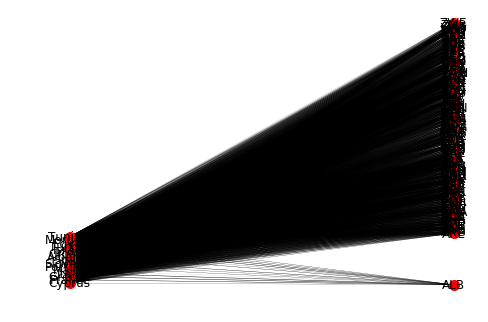

In [22]:
pos = nx.random_layout(G_w_exp, dim =2)
i=0
j=0
for key in pos:
    if key in paesi_mena:
        i = 1
        pos[key]= [i,j]
        j=j+200
    if key not in paesi_mena:
        i = 2
        pos[key]= [i,j]
        j=j+100
        
        

nx.draw(G_w_exp, pos=pos, width=weights, node_size=100, with_labels=True)

    

In [23]:
#nx.write_edgelist(G_w_exp,'grafo.csv', data=False)
#writing edgelist for visualization in Gephi

### Network for import


In [24]:
G_w_imp=nx.Graph()


X=[]
for c in importing_country_array_unique:
    i=0
    for m in paesi_mena:
        country_imp='PESI_IMP_'+c
        x=PESI_IMP_TOT[country_imp][0][i]
        X.append(x)
        if c!=m:
            G_w_imp.add_edge(c, m, weight=x[0])
            #G_w_exp.add_weighted_edges_from()
            #G_w_exp.add_edge(c, m)
        i=i+1

max_X=max(X)
min_X=min(X)





In [25]:
#G_w_exp.edges.data('weight')
d=importing_country_array_unique

In [81]:
Xa=np.array(X)


edge_X=nx.get_edge_attributes(G_w_imp,'weight')
#plt.plot(Xa)
#plt.show()

pesi=[]
for key in edge_X:
    if edge_X[key] >1:
        edge_X[key] = 0.1*np.log10(edge_X[key])
    else:
        edge_X[key] = 0.001
    pesi.append(edge_X[key])
    
    

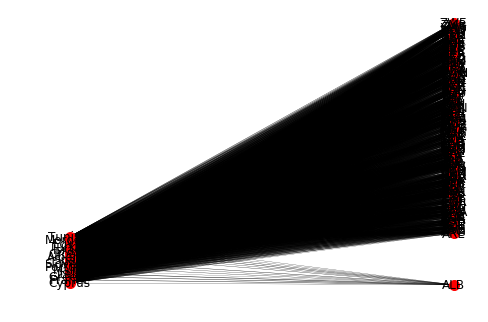

In [82]:
pos = nx.random_layout(G_w_imp, dim =2)
i=0
j=0
for key in pos:
    if key in paesi_mena:
        i = 1
        pos[key]= [i,j]
        j=j+200
    if key not in paesi_mena:
        i = 2
        pos[key]= [i,j]
        j=j+100
        
        

nx.draw(G_w_imp, pos=pos, width=pesi, node_size=100, with_labels=True)

    

In [ ]:
#nx.write_edgelist(G_w_imp,'grafo_imp.csv', data=False)
#writing edgelist for visualization in Gephi
    

# Oriented Graph

In [28]:
SBIL = [] 
for country_code in exporting_country_array_unique:
    for i in range(15):
        SBIL.append(PESI_EXP_TOT["PESI_EXP_"+country_code][0][i][0]- PESI_IMP_TOT["PESI_IMP_"+country_code][0][i][0])
        
#NOTA: lo sbilanciamento è una lista di liste. Ciascuna lista, rappresenta la differenza fra
#il totale delle importazioni ed il totale delle esportazioni di un paese verso uno dei Paesi Mena.
#Quindi ad esempio, in SBILANCIAMENTI[0] (cfr sotto), ho il totale degli sbilanciamenti dell'Albania
#vero ciascuno dei 15 paesi mena. Il primo valore, -115 ad esempio, indica che l'Albania importa più di quello che esporta da Cipro...

In [29]:
SBILANCIAMENTI = [SBIL[x:x+15] for x in range(0,1935,15)]
#SBILANCIAMENTI[1]
SBILANCIAMENT = dict()
for country_code in importing_country_array_unique:
    SBILANCIAMENT["SBILANCIAMENTI_"+country_code] = []

for num,key in enumerate(SBILANCIAMENT.keys()):
    SBILANCIAMENT[key].append(SBILANCIAMENTI[num])
 


In [30]:
G_w_sbil = nx.DiGraph()
#exporting_country_array_unique == importing_country_array_unique

J=[]
for c in importing_country_array_unique:
    i=0
    for m in paesi_mena:
        country_sbil='SBILANCIAMENTI_'+c
        j=SBILANCIAMENT[country_sbil][0][i]
        J.append(j)
        if c!=m:
            G_w_sbil.add_edge(c, m, weight=j)
            if j<0:
                G_w_sbil.remove_edge(c, m)
                
            #G_w_exp.add_weighted_edges_from()
            #G_w_exp.add_edge(c, m)
        i=i+1

max_J=max(J)
min_J=min(J)

In [31]:
Ja=np.array(J)


edge_J=nx.get_edge_attributes(G_w_sbil,'weight')

#edge_J contiene i soli edges con sbilanciamento positivo. Pertanto,
#NON conterrà tutti gli edges come il grafo di importazioni ed esportazioni,
#ma molti meno (532)


In [32]:
#nx.write_edgelist(G_w_sbil,'grafo_sbil.csv', data=False)
#writing edgelist for visualization in Gephi

peso=[]
for key in edge_J:
    if edge_J[key]>1:
        edge_J[key] = 0.1*np.log10(edge_J[key])
    peso.append(edge_J[key])
    
    
 

In [33]:
for key in edge_J:
    if edge_J[key]==0:
        edge_J[key] = 0.01

In [34]:
#Converto gli 0 in 0.01
for i in range(532):
    if peso[i] == 0.:
        peso[i]=0.01
#peso

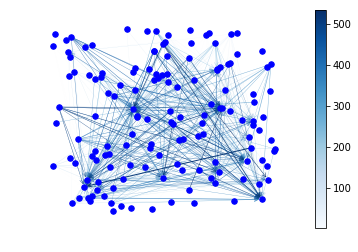

In [35]:
#GRAFICO FIGO...

pos = nx.random_layout(G_w_sbil, dim =2)
       
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt

node_sizes = [3+ 10 * i for i in range(len(G_w_sbil))]
M = G_w_sbil.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G_w_sbil, pos, node_size=30, node_color='blue')
edges = nx.draw_networkx_edges(G_w_sbil, pos, node_size=30, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=peso)


#set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

pc = mpl.collections.PatchCollection(edges, cmap=plt.cm.Blues)
pc.set_array(edge_colors)
plt.colorbar(pc)

ax = plt.gca()
ax.set_axis_off()
plt.show()




#nx.draw(G_w_sbil, pos=pos, width=peso, node_size=100, with_labels=True)




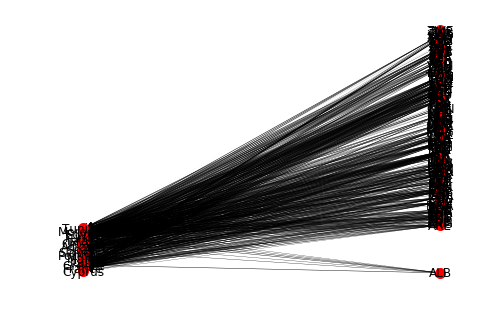

In [196]:
#GRAFICO ORDINARIO

i=0
j=0
for key in pos:
    if key in paesi_mena:
        i = 1
        pos[key]= [i,j]
        j=j+200
    if key not in paesi_mena:
        i = 2
        pos[key]= [i,j]
        j=j+100

nx.draw(G_w_sbil, pos=pos, width=peso, node_size=100, with_labels=True)




## Bowtie structure

In [51]:
#getting the biggest strongly connected component, that is the biggest components that can be reached starting from any other arbitrary node
scc=[(len(c),c) for c in sorted( nx.strongly_connected_components \
                               (G_w_sbil), key=len, reverse=True)]

biggest_scc = [(len(c),c) for c in sorted( nx.strongly_connected_components \
                               (G_w_sbil), key=len, reverse=True)][0][1]


#scc restituisce a generator of sets of nodes, ONE for each strongly connected component of G.
#biggest_scc restituisce il nodo rappresentante la biggest strongly connected component del grafo.

In [54]:
#preparing the IN and OUT component
IN_component=[]
for n in biggest_scc:
    for s in G_w_sbil.predecessors(n):
        if s in biggest_scc: continue
        if not s in IN_component:
            IN_component.append(s)
            
OUT_component=[]
for n in biggest_scc:
    for s in G_w_sbil.successors(n):
        if s in biggest_scc: continue
        if not s in OUT_component:
            OUT_component.append(s)
            

#list(G_w_sbil.successors('Greece'))

In [62]:
#generating the subgraph
bowtie=list(biggest_scc)+IN_component+OUT_component
G_w_sbil_bowtie = G_w_sbil.subgraph(bowtie) #organizzo il bowtie in un sottografo

In [66]:
#defining the proper layout
pos={}
in_y=100.
pos['Greece']=(150.,in_y)

in_step=700.
for in_n in IN_component:
    pos[in_n]=(100.,in_y)
    in_y=in_y+in_step

out_y=100.
out_step=500.   
for out_n in OUT_component:
    pos[out_n]=(200,out_y)
    out_y=out_y+out_step

pos

{'Greece': (150.0, 100.0),
 'ALB': (100.0, 100.0),
 'ARE': (100.0, 800.0),
 'ARM': (100.0, 1500.0),
 'BHR': (100.0, 2200.0),
 'CHE': (100.0, 2900.0),
 'CYP': (100.0, 3600.0),
 'CZE': (100.0, 4300.0),
 'DEU': (100.0, 5000.0),
 'GBR': (100.0, 5700.0),
 'GRC': (100.0, 6400.0),
 'HKG': (100.0, 7100.0),
 'HRV': (100.0, 7800.0),
 'ISR': (100.0, 8500.0),
 'ITA': (100.0, 9200.0),
 'JPN': (100.0, 9900.0),
 'KOR': (100.0, 10600.0),
 'KWT': (100.0, 11300.0),
 'LUX': (100.0, 12000.0),
 'MLT': (100.0, 12700.0),
 'PRT': (100.0, 13400.0),
 'QAT': (100.0, 14100.0),
 'SAU': (100.0, 14800.0),
 'SGP': (100.0, 15500.0),
 'SVK': (100.0, 16200.0),
 'SVN': (100.0, 16900.0),
 'SWE': (100.0, 17600.0),
 'TUR': (100.0, 18300.0),
 'TWN': (100.0, 19000.0),
 'XER': (100.0, 19700.0),
 'XNF': (100.0, 20400.0),
 'XTW': (100.0, 21100.0)}

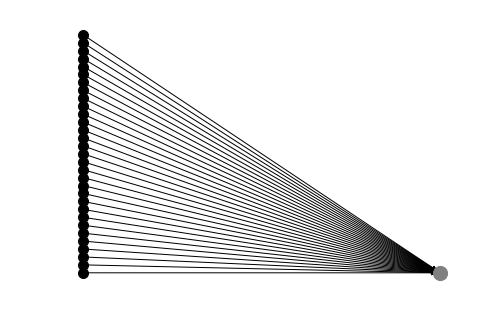

In [68]:
#plot the bowtie structure
nx.draw(G_w_sbil_bowtie, pos, node_size=50)

nx.draw_networkx_nodes(G_w_sbil_bowtie, pos, IN_component, node_size=100, node_color='Black')
nx.draw_networkx_nodes(G_w_sbil_bowtie, pos, OUT_component, node_size=100, node_color='White')
nx.draw_networkx_nodes(G_w_sbil_bowtie, pos, biggest_scc, node_size=200, node_color='Grey')


# Graph percolation and community detection

In [103]:
from ipywidgets import interact
from ipywidgets import FloatSlider
from ipywidgets import IntSlider

#PERCULATION OF A NETWORK: take the strongest links time by time (a seconda del th sono evidenziati gli stronger links)
#PER IMPORT:
pos = nx.random_layout(G_w_imp, dim=2)
def percolation(th):
    G_sel = nx.Graph()
    edge_sel=[ii for ii in list(G_w_imp.edges.data('weight')) if ii[2]>th] 
    G_sel.add_weighted_edges_from(edge_sel)
    nx.draw(G_sel, pos=pos, node_size = 100, node_color='darkturquoise', with_labels=True, font_weight='bold')
    plt.show()

#maxi=len(list(G_w_imp.nodes))
maxi = max([ii[2] for ii in list(G_w_imp.edges.data('weight'))])
interact(percolation, th=IntSlider(min=2, max=maxi, step=1, value=144))#, continuous_update=False))



interactive(children=(IntSlider(value=144, description='th', max=6026400, min=2), Output()), _dom_classes=('wi…

<function __main__.percolation(th)>

In [104]:
#PER EXPORT
pos = nx.random_layout(G_w_exp, dim=2)
def percolation(th):
    G_sel = nx.Graph()
    edge_sel=[ii for ii in list(G_w_exp.edges.data('weight')) if ii[2]>th] 
    G_sel.add_weighted_edges_from(edge_sel)
    nx.draw(G_sel, pos=pos, node_size = 100, node_color='darkturquoise', with_labels=True, font_weight='bold')
    plt.show()

#maxi=len(list(G_w_imp.nodes))
maxi = max([ii[2] for ii in list(G_w_exp.edges.data('weight'))])
interact(percolation, th=IntSlider(min=2, max=maxi, step=1, value=144))#, continuous_update=False))



interactive(children=(IntSlider(value=144, description='th', max=5863392, min=2), Output()), _dom_classes=('wi…

<function __main__.percolation(th)>